# Sonar Dataset

An introduction to binary classification dataset

## Introduction

A dataset from:
http://archive.ics.uci.edu/ml/datasets/connectionist+bench+(sonar,+mines+vs.+rocks)

## Initialization

In [1]:
RANDOM_SEED = 42 #@param {type:'integer'}
BASE_PATH = 'http://archive.ics.uci.edu/ml/machine-learning-databases/undocumented/connectionist-bench/sonar' #@param {type:'string'}

### Imports

The classic ones

In [2]:
import pandas as pd
import numpy as np
np.random.seed(RANDOM_SEED)
import matplotlib.pyplot as plt
import seaborn as sns

### Load dataset

We'll first have to download the dataset itself

In [3]:
import requests
def get_file(filename: str, save_as: str):
  response = requests.get(f'{BASE_PATH}/{filename}')
  with open(save_as, 'w+') as writer:
    writer.write(response.text)
get_file('sonar.all-data', 'sonar.all-data.csv')

Then, we'll just parse it, since we're working without columns, we'll create some ourselves

In [4]:
feature_names = [ f'col_{index}' for index in range(60) ]
columns = [ *feature_names, 'target' ]

In [5]:
dataframe = pd.read_csv('sonar.all-data.csv', names=columns)
dataframe.head(5)

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,...,col_51,col_52,col_53,col_54,col_55,col_56,col_57,col_58,col_59,target
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


## Data Analysis

Meant to extract more insight about the data that we have

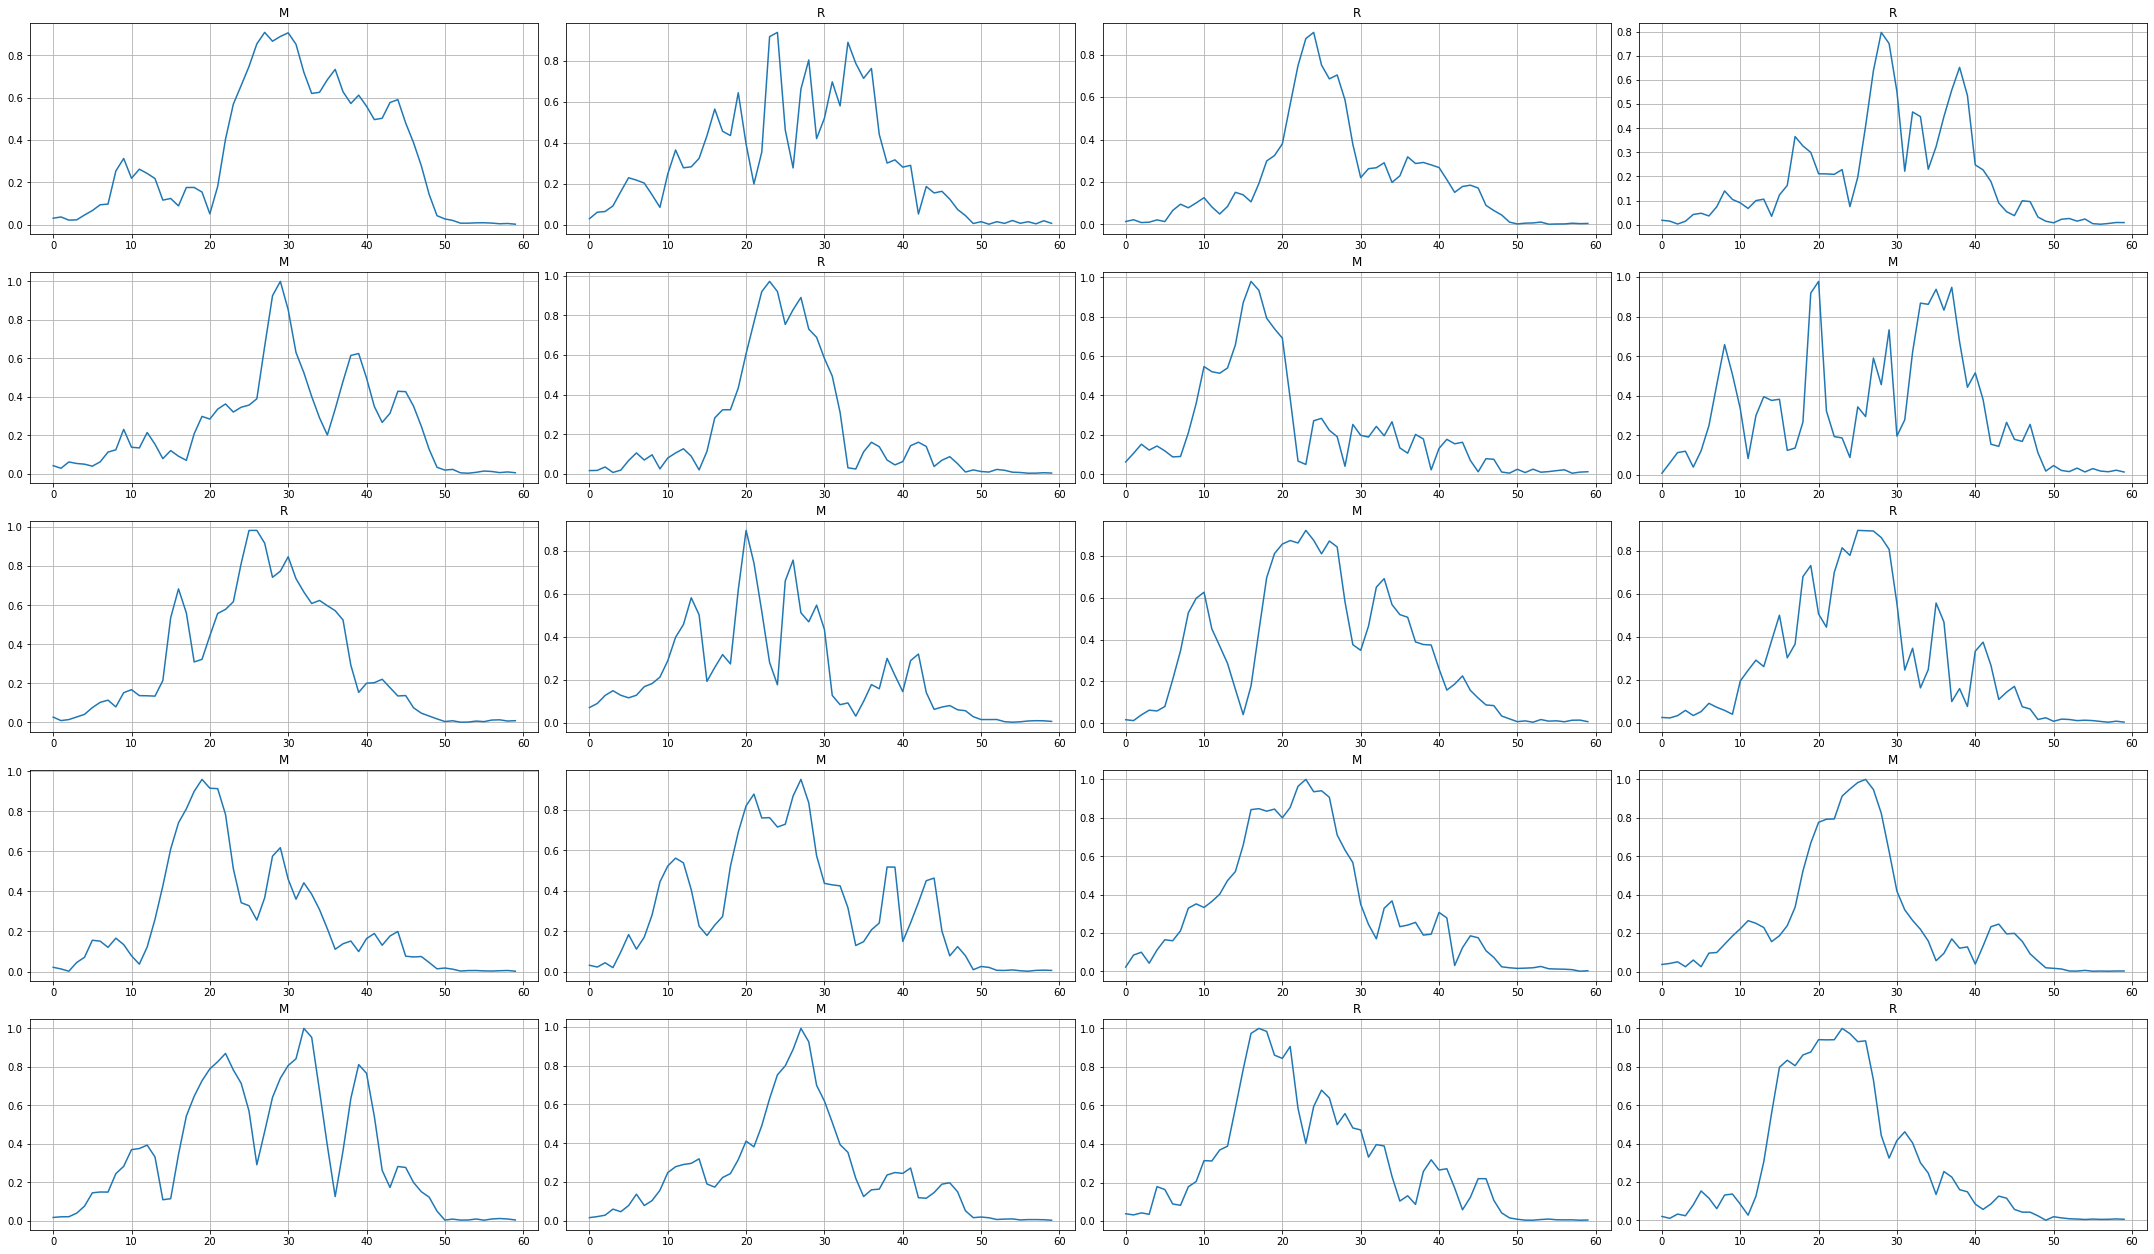

In [6]:
rows, cols = (5, 4)
fig, axes = plt.subplots(rows, cols, figsize=(cols * 7.5, rows * 3.5))
# fig.suptitle('Random sonar signals')
axes.flatten()
random_sonars = dataframe.sample(rows * cols).values
for index, row in enumerate(random_sonars):
  ax = axes[int(index / cols), int(index % cols)]
  ax.set_title(row[60])
  ax.grid()
  ax.plot(row[0:60])
plt.tight_layout(pad=1.0, h_pad=.5, w_pad=.5)

### Pattern similarity and analysis

Since we're analyzing signals, we can try to look for a pattern. For that we can use the mean of each label and compare them

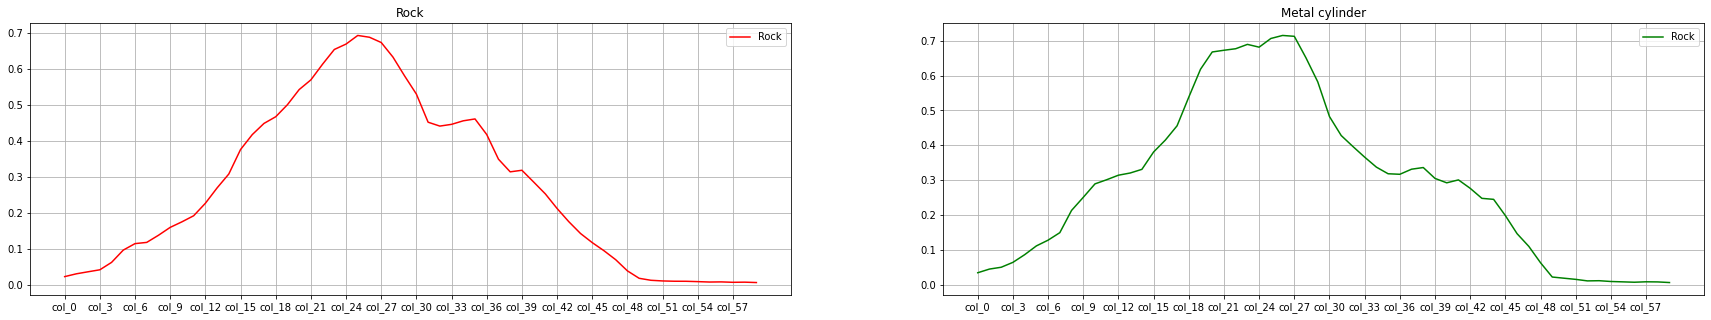

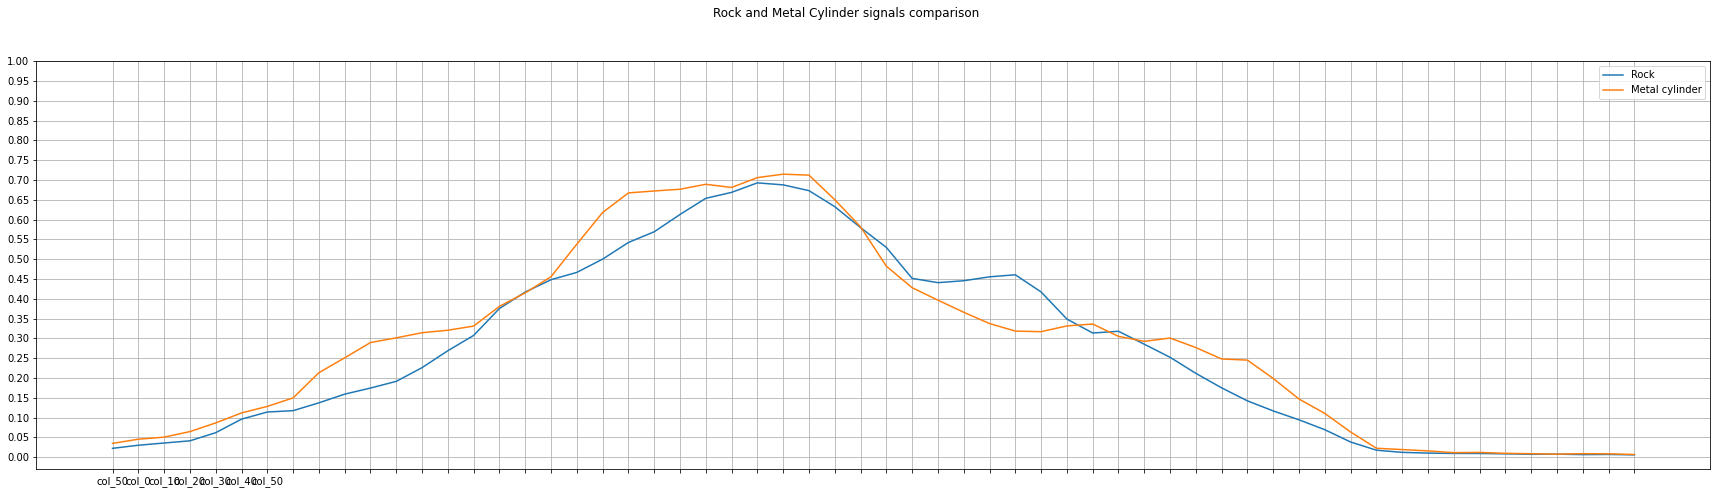

In [7]:
# dataframe[ dataframe['target' == 'R'] ].mean().plot()
fig, axes = plt.subplots(1, 2, figsize=(30, 5))

axes[0].set_title('Rock')
axes[0].set_xticks(range(0, 60, 3))
dataframe[ dataframe['target'] == 'R' ].select_dtypes(include=np.number).mean().plot(ax=axes[0], color='red', label='R')
axes[0].grid()
axes[0].legend(['Rock', 'Metal cylinder'])

axes[1].set_title('Metal cylinder')
axes[1].set_xticks(range(0, 60, 3))
dataframe[ dataframe['target'] == 'M' ].select_dtypes(include=np.number).mean().plot(ax=axes[1], color='green', label='M')
axes[1].grid()
axes[1].legend(['Rock', 'Metal cylinder'])
# plt.tight_layout(pad=.5, h_pad=.5, w_pad=.5)

plt.figure(figsize=(30, 7.5))
plt.suptitle('Rock and Metal Cylinder signals comparison')
dataframe[ dataframe['target'] == 'R' ].select_dtypes(include=np.number).mean().plot(label='R')
dataframe[ dataframe['target'] == 'M' ].select_dtypes(include=np.number).mean().plot(label='M')
plt.grid()
plt.yticks(np.array(range(0, 101, 5)) / 100)
plt.xticks(range(0, 60))
plt.legend(['Rock', 'Metal cylinder'])

## Data cleansening & preprocessing

Mkaing sure the data is quality data

### Missing values

We know that it has no missing values, so, we can expect it's shape to get a little more insight

In [8]:
dataframe.shape

(208, 61)

### Abnormal values

For this case scenario, all of the values should be between 0 and 1

In [9]:
df_describe = dataframe.describe().transpose()
df_describe.head(5)

,count,mean,std,min,25%,50%,75%,max
col_0,208.0,0.029164,0.022991,0.0015,0.013350,0.02280,0.035550,0.1371
col_1,208.0,0.038437,0.032960,0.0006,0.016450,0.03080,0.047950,0.2339
col_2,208.0,0.043832,0.038428,0.0015,0.018950,0.03430,0.057950,0.3059
col_3,208.0,0.053892,0.046528,0.0058,0.024375,0.04405,0.064500,0.4264
col_4,208.0,0.075202,0.055552,0.0067,0.038050,0.06250,0.100275,0.4010


Values below zero

In [10]:
df_describe[ df_describe['min'] < 0 ]

,count,mean,std,min,25%,50%,75%,max


Values above one

In [11]:
df_describe[ df_describe['max'] > 1 ]

,count,mean,std,min,25%,50%,75%,max


### Standarization

The target value is non-numeric, we should fix that so that our model can actually understand it

In [12]:
target_dict = { 'R': 0, 'M': 1 }
reverse_target_dict = { 0: 'R', 1: 'M' }

In [13]:
dataframe['target'] = dataframe['target'].apply(lambda x: target_dict[x])

In [14]:
dataframe['target'].unique()

array([0, 1])

### Correlation

How "similar" two values are when compared to each other

An overall view, we can observe that, the closer they are the more correlated, since there's not much insight about each column, we can't trulyl determine if that's a good or a bad thing

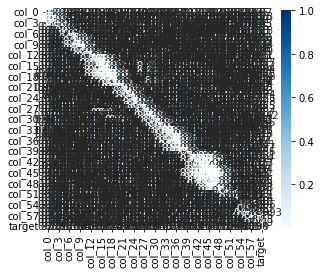

In [15]:
df_corr = dataframe.corr().abs()
sns.heatmap(df_corr, annot=True, square=True, cbar=True, cmap='Blues')

A more in-detail view

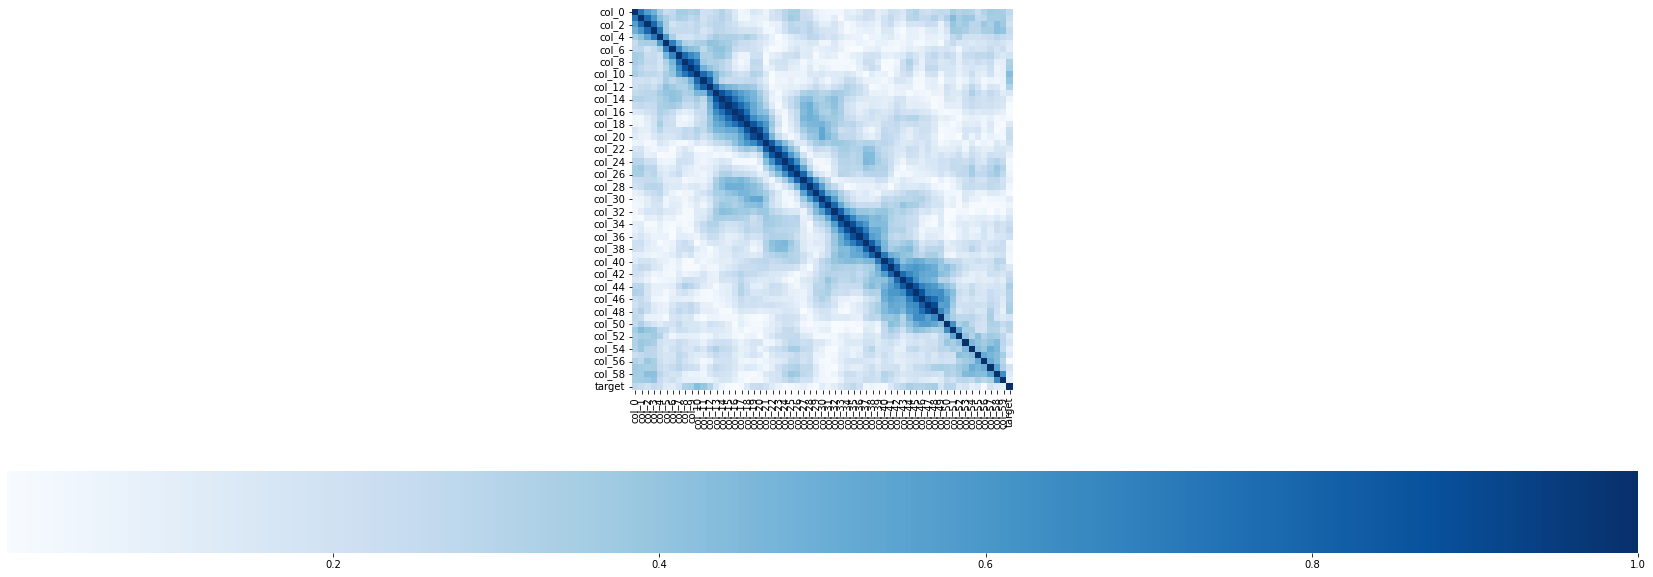

In [16]:
plt.figure(figsize=(30, 10))
df_corr = dataframe.corr().abs()
sns.heatmap(df_corr, square=True, cbar=True, cmap='Blues', cbar_kws={"orientation": "horizontal"})

## Data Science

Preparing the data for our model, the last touches

### Imports

In [17]:
from sklearn.metrics import balanced_accuracy_score, f1_score, confusion_matrix

### Assignment

In [18]:
feature_names = [ col for col in dataframe.columns if col not in ['target'] ]

In [19]:
X = dataframe[feature_names]
y = dataframe['target']

### Imbalancement

Imbalancement in classification may, and will, add bias, having a biased model is one of the least things we want, it is highly deceiving, a higher score doesn't mean it won't be discriminating the minorities (and we've had enought of that already in this world).

Before

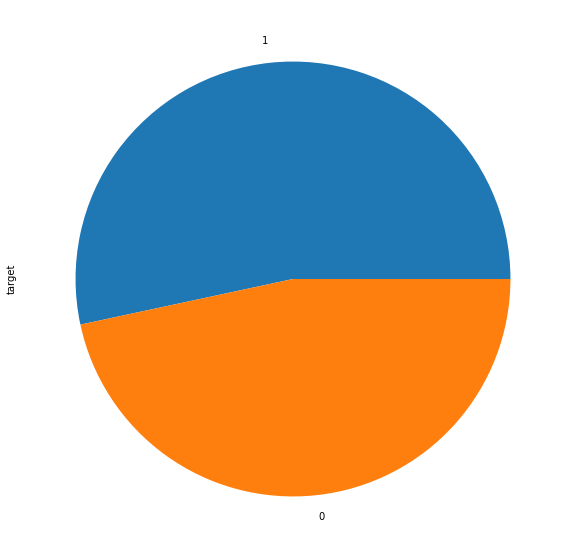

In [20]:
plt.figure(figsize=(10, 10))
y.value_counts().plot.pie()

Fixing the imbalancement

In [21]:
from imblearn.under_sampling import RandomUnderSampler
X, y = RandomUnderSampler(random_state=RANDOM_SEED).fit_resample(X, y)

After

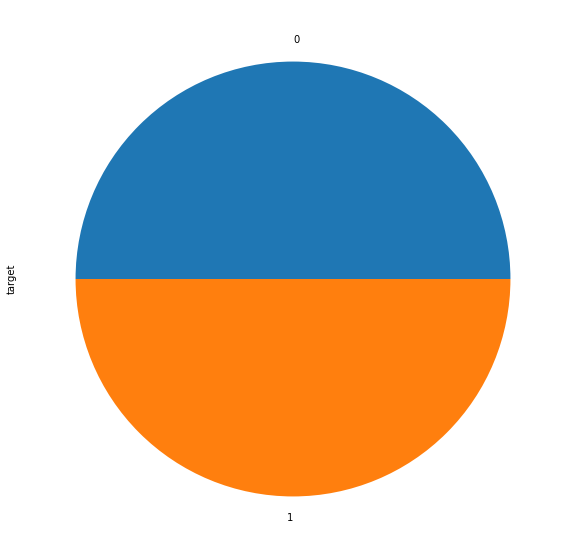

In [22]:
plt.figure(figsize=(10, 10))
y.value_counts().plot.pie()

In [23]:
len(y)

194

### Splitting

We'll need two sets of data, one of training and one for testing the performance, but, since we're working with imbalancement and classification, weneed to stratify the target value

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=RANDOM_SEED, stratify=y)

And we fix the imbalancement in the test set, we don't have too, but it'll greatly help us later down the line

In [25]:
X_test, y_test = RandomUnderSampler(random_state=RANDOM_SEED).fit_resample(X_test, y_test)

### XGBoost

A gradient boosted regularized technique.

In [26]:
from xgboost import XGBClassifier
xgboost_clf = XGBClassifier(random_state=RANDOM_SEED)
xgboost_clf.fit(X_train, y_train)
y_pred = xgboost_clf.predict(X_test)

In [27]:
print('test', xgboost_clf.score(X_test, y_test))
print('balanced test', balanced_accuracy_score(y_test, y_pred))
print('train', xgboost_clf.score(X_train, y_train))
print('balanced train', balanced_accuracy_score(y_train, xgboost_clf.predict(X_train)))

test 0.8421052631578947
balanced test 0.8421052631578947
train 1.0
balanced train 1.0


### Confussion matrix

An easy way to identify the hits or miss of our model, and it's bias

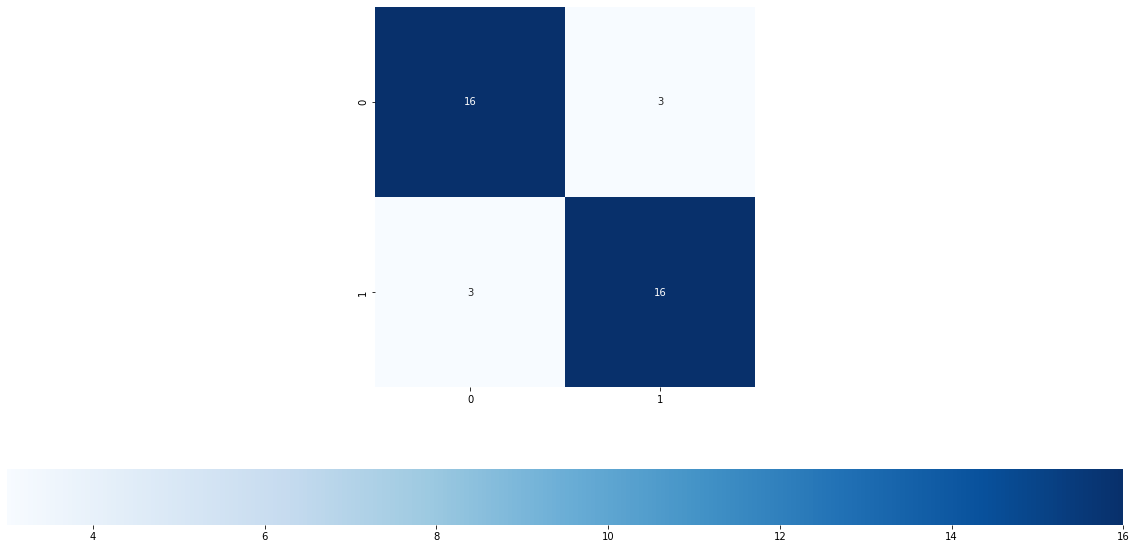

In [28]:
plt.figure(figsize=(20, 10))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, square=True, cbar=True, cmap='Blues', cbar_kws={"orientation": "horizontal"})

### Evaluation

We could evaluate the results by plotting the label and the signals to see how far off they actually were. It's more of a human metric than nothing else

In [29]:
X_test.index

RangeIndex(start=0, stop=38, step=1)

In [30]:
y_pred

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0])

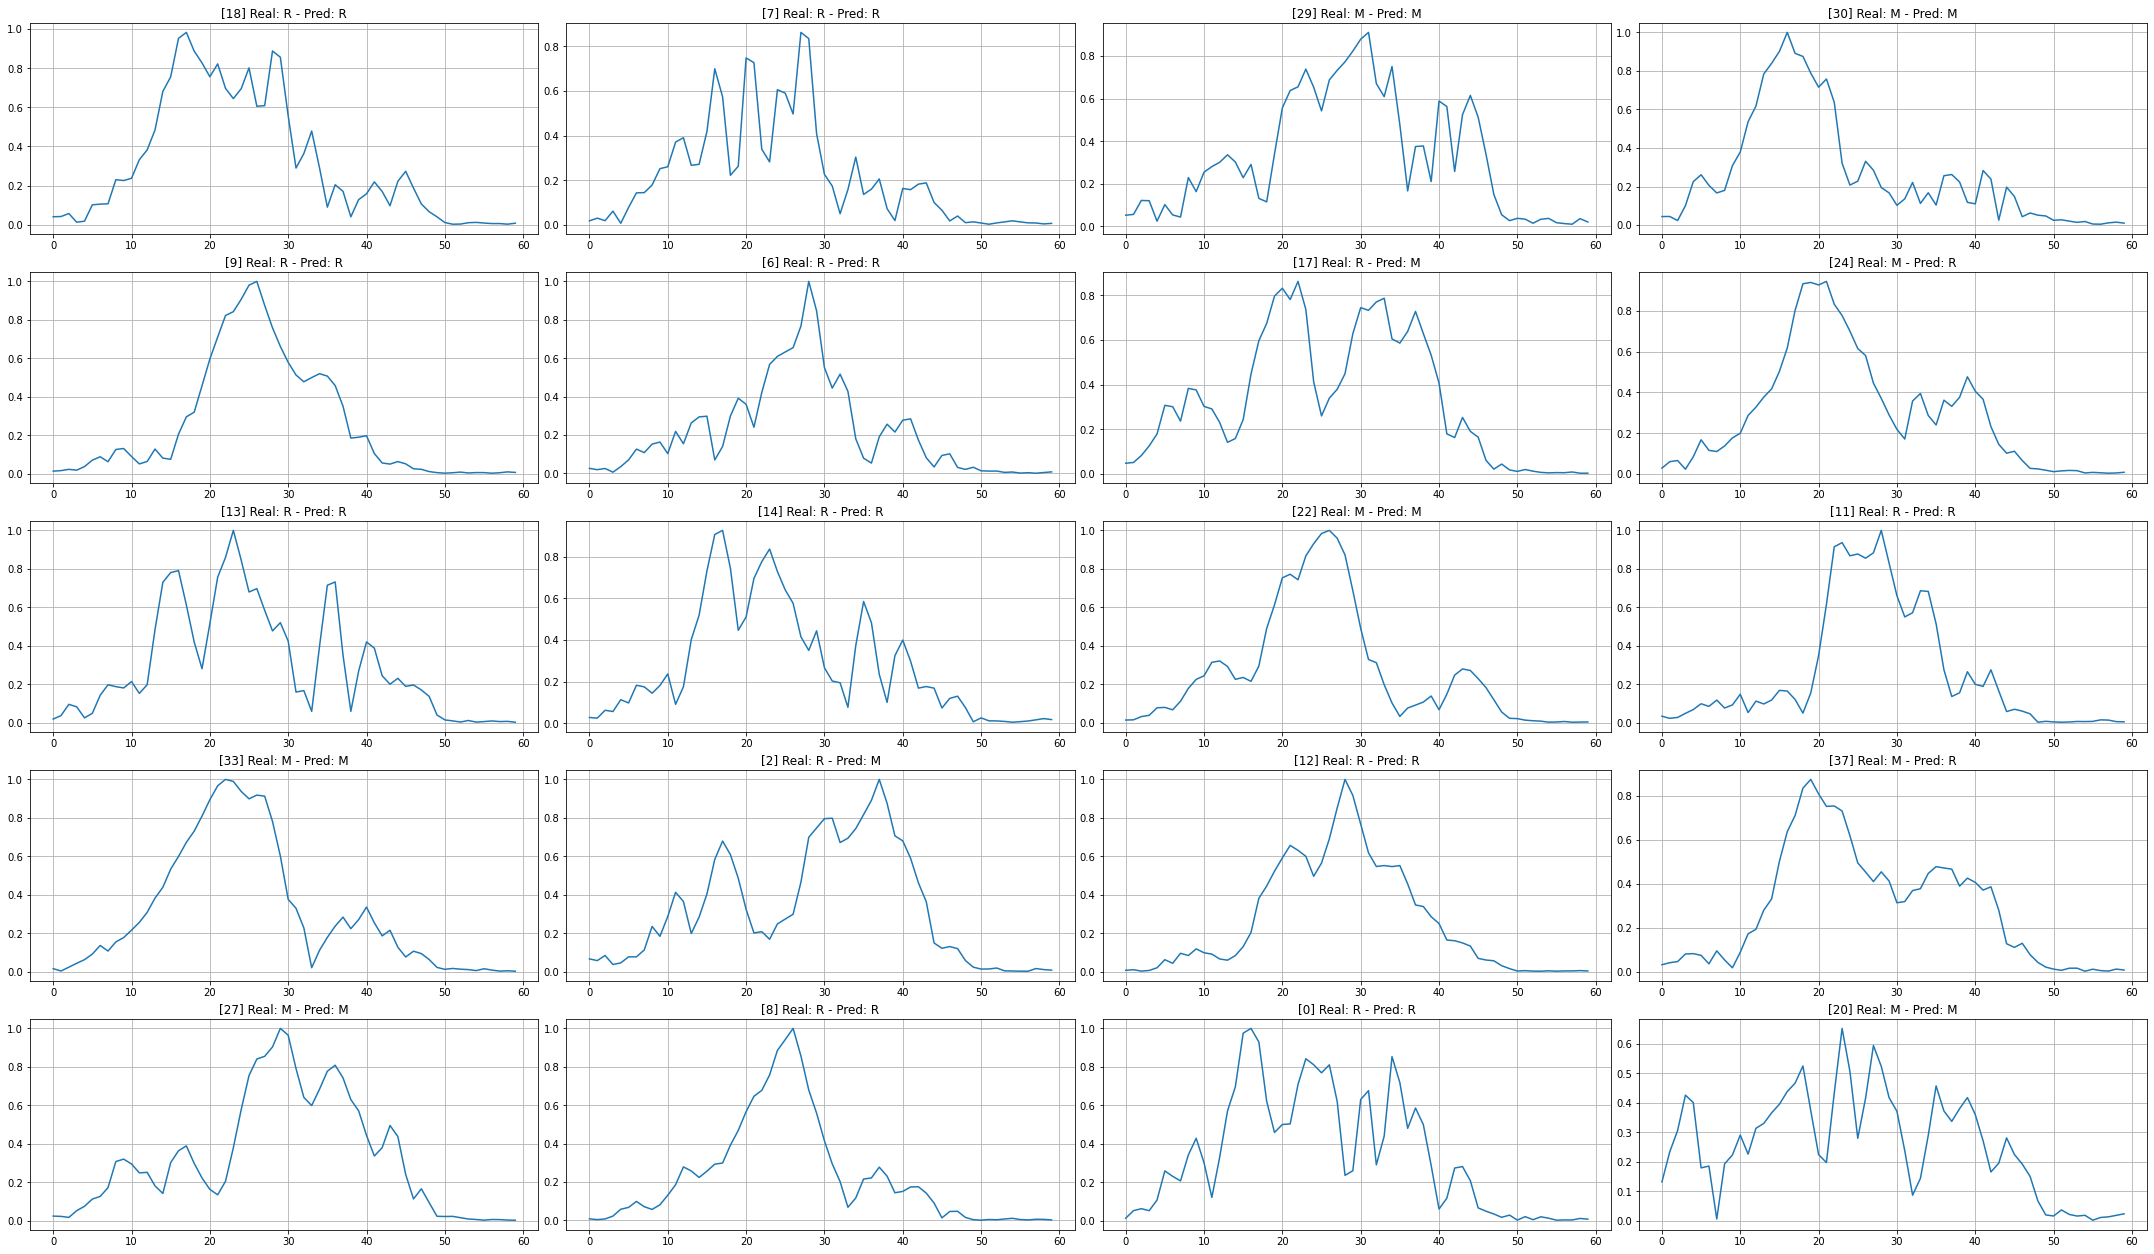

In [31]:
rows, cols = (5, 4)
fig, axes = plt.subplots(rows, cols, figsize=(cols * 7.5, rows * 3.5))
axes.flatten()
evaluation_sonars = X_test.sample(rows * cols)

index = 0
for row_index, row in zip(evaluation_sonars.index, evaluation_sonars.values):
  ax = axes[int(index / cols), int(index % cols)]
  ax.set_title(f'[{row_index}] Real: {reverse_target_dict[y_test[row_index]]} - Pred: {reverse_target_dict[y_pred[row_index]]}')
  ax.grid()
  ax.plot(row)
  index += 1
plt.tight_layout(pad=1.0, h_pad=.5, w_pad=.5)

### Using PCA

Principal Component Analysis helps us reduce the number of features while containing almost all of it's information

In [32]:
from sklearn.decomposition import PCA

explainability = []
for n_components in range(1, dataframe.shape[1]):
  explained = PCA(n_components).fit(X_train, y_train).explained_variance_ratio_.sum()
  explainability.append((n_components, explained))
df_explainability = pd.DataFrame(explainability, columns=['N_Components', 'Explained'])

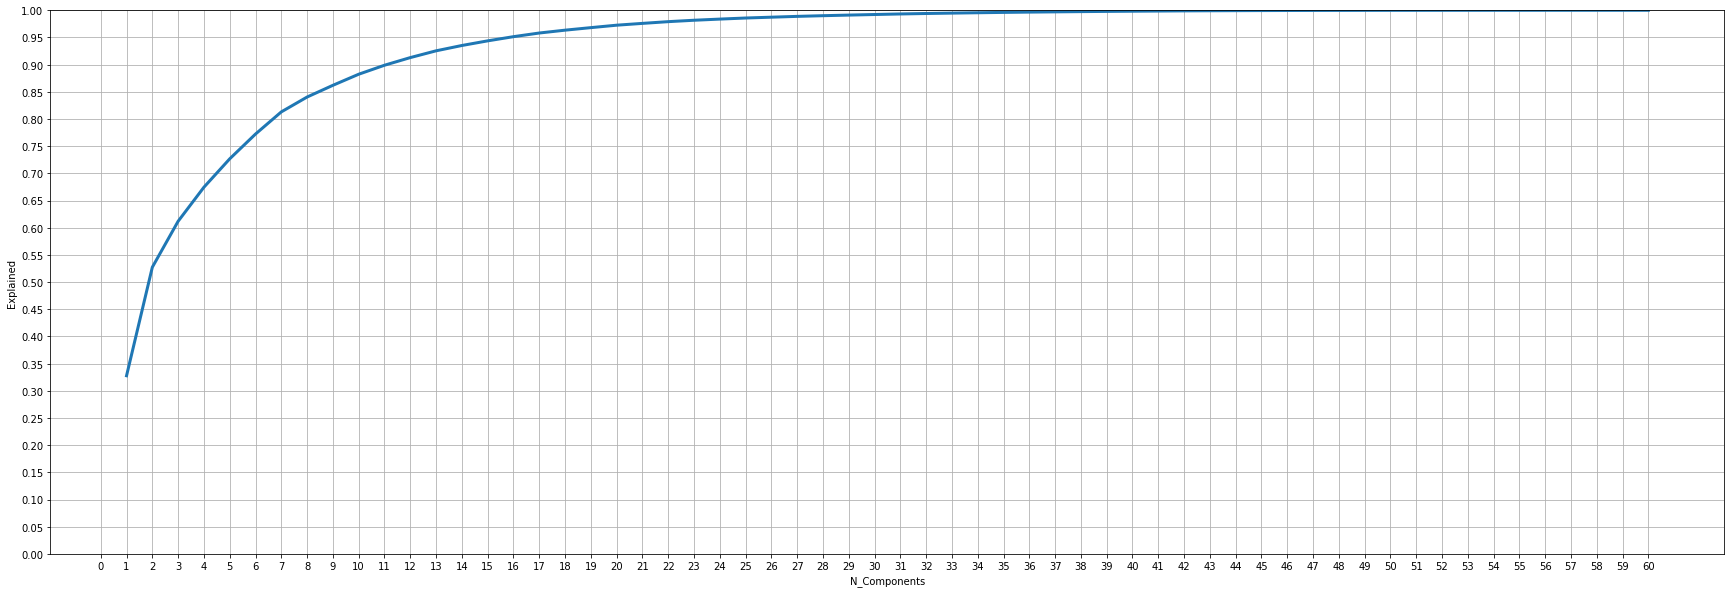

In [33]:
plt.figure(figsize=(30, 10))
plt.xticks(range(61))
plt.grid()
plt.ylim(0, 1)
plt.yticks(np.array(range(0, 101, 5)) / 100)
_ = sns.lineplot(data=df_explainability, x='N_Components', y='Explained', lw=3)

We could determine that, maybe, 8 components give a good level of explainability so that our model can operate faster

In [34]:
n_components = 8
n_components = 17
pca_model = PCA(n_components).fit(X_train)
X_train_pca = pca_model.transform(X_train)
X_test_pca = pca_model.transform(X_test)

In [35]:
from xgboost import XGBClassifier
xgboost_clf_pca = XGBClassifier(random_state=RANDOM_SEED)
xgboost_clf_pca.fit(X_train_pca, y_train)

XGBClassifier(random_state=42)

In [36]:
y_pred_pca = xgboost_clf_pca.predict(X_test_pca)
print('test', xgboost_clf_pca.score(X_test_pca, y_test))
print('balanced test', balanced_accuracy_score(y_test, y_pred))

test 0.8421052631578947
balanced test 0.8421052631578947
